In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [6]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [7]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [8]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [9]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import add
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Input,Model
import tensorflow.keras.layers

In [11]:
inp=Input(shape=(32, 32, 3),name='input_layer')


x=Conv2D(32,3,activation='relu',name='b1_c1')(inp)


x=Conv2D(64,3,activation='relu',name='b1_c2')(x)

In [12]:
x = MaxPooling2D(3,name='b1_out')(x)

Fx=Conv2D(64,3,activation='relu',
     padding='same',name='b2_c1')(x)

Fx=Conv2D(64,3,activation='relu',
     padding='same',name='b2_c2')(Fx)
          
b2_out = add([Fx, x],name='b2_out')

In [13]:
x = Conv2D(64,3,activation='relu',
       name='b3_c1')(b2_out)
x = GlobalAveragePooling2D(name='GAP')(x)

In [14]:
x = Dense(256, activation='relu',name='h1')(x)

x = Dropout(0.5,name='h1_dropout')(x)

outp=Dense(10,activation='softmax',
      name='out_layer')(x)

In [15]:
model =Model(inp,outp, name='min_resnet')

In [16]:
print(model.summary())

Model: "min_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 b1_c1 (Conv2D)                 (None, 30, 30, 32)   896         ['input_layer[0][0]']            
                                                                                                  
 b1_c2 (Conv2D)                 (None, 28, 28, 64)   18496       ['b1_c1[0][0]']                  
                                                                                                  
 b1_out (MaxPooling2D)          (None, 9, 9, 64)     0           ['b1_c2[0][0]']                  
                                                                                         

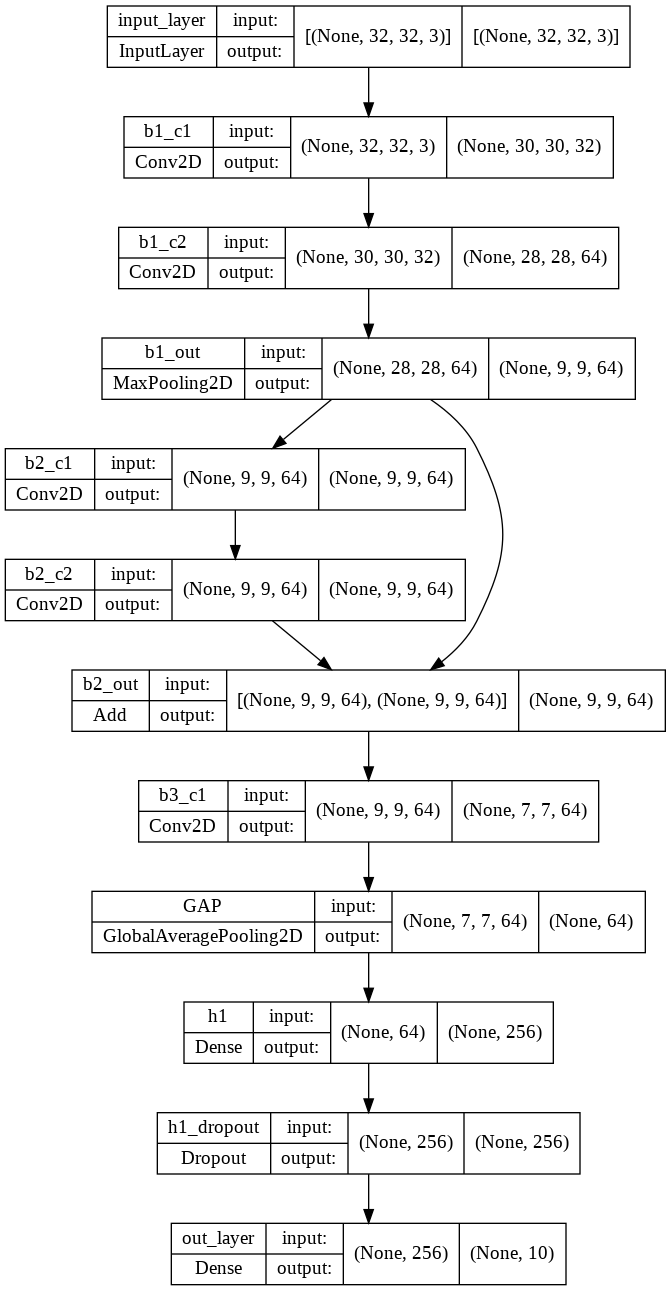

In [17]:
tensorflow.keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [19]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=10,verbose=2)            

Epoch 1/10
200/200 - 16s - loss: 1.9040 - acc: 0.2565 - val_loss: 1.6624 - val_acc: 0.3808 - 16s/epoch - 81ms/step
Epoch 2/10
200/200 - 4s - loss: 1.5780 - acc: 0.3981 - val_loss: 1.4019 - val_acc: 0.4816 - 4s/epoch - 18ms/step
Epoch 3/10
200/200 - 4s - loss: 1.4001 - acc: 0.4828 - val_loss: 1.2982 - val_acc: 0.5194 - 4s/epoch - 18ms/step
Epoch 4/10
200/200 - 3s - loss: 1.2822 - acc: 0.5262 - val_loss: 1.1876 - val_acc: 0.5620 - 3s/epoch - 17ms/step
Epoch 5/10
200/200 - 3s - loss: 1.1960 - acc: 0.5645 - val_loss: 1.0868 - val_acc: 0.6070 - 3s/epoch - 17ms/step
Epoch 6/10
200/200 - 3s - loss: 1.1206 - acc: 0.5935 - val_loss: 1.0838 - val_acc: 0.6025 - 3s/epoch - 17ms/step
Epoch 7/10
200/200 - 4s - loss: 1.0660 - acc: 0.6104 - val_loss: 0.9915 - val_acc: 0.6391 - 4s/epoch - 18ms/step
Epoch 8/10
200/200 - 3s - loss: 1.0155 - acc: 0.6361 - val_loss: 0.9477 - val_acc: 0.6595 - 3s/epoch - 17ms/step
Epoch 9/10
200/200 - 4s - loss: 0.9566 - acc: 0.6562 - val_loss: 0.9109 - val_acc: 0.6682 - 4s

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

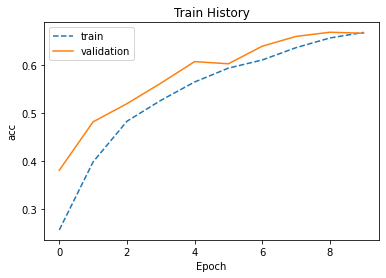

In [21]:
show_train_history(train_history,'acc','val_acc')

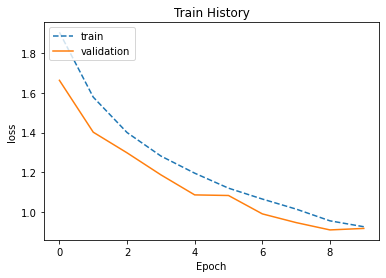

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.9434 - acc: 0.6541 - 1s/epoch - 4ms/step


In [24]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.943446695804596 test_acc= 0.6541000008583069


# 進行預測

In [25]:
probability = model.predict(x_test_normalize)

In [26]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [27]:
prediction

array([5, 8, 8, ..., 5, 2, 7])

# 查看預測結果

In [28]:
import matplotlib.pyplot as plt 

In [29]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [30]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

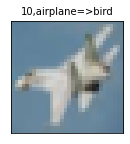

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

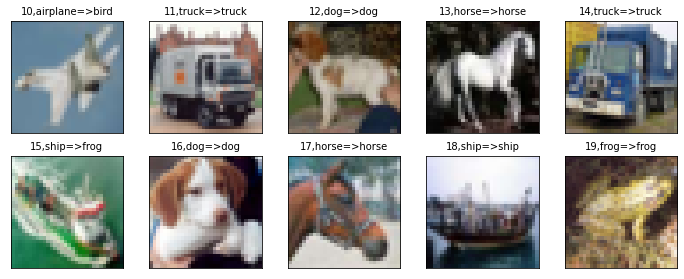

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [33]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

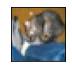

label: cat
predict: dog
airplane   Probability:0.000798897
automobile Probability:0.000158967
bird       Probability:0.005461878
cat        Probability:0.457486302
deer       Probability:0.009149508
dog        Probability:0.509345651
frog       Probability:0.004841423
horse      Probability:0.010936447
ship       Probability:0.001575491
truck      Probability:0.000245401


In [34]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

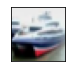

label: ship
predict: ship
airplane   Probability:0.005063449
automobile Probability:0.217748225
bird       Probability:0.000007890
cat        Probability:0.000020212
deer       Probability:0.000005439
dog        Probability:0.000000822
frog       Probability:0.000003284
horse      Probability:0.000001001
ship       Probability:0.775782406
truck      Probability:0.001367240


In [35]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [36]:
import pandas as pd

In [37]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [38]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,678,14,110,12,30,5,7,36,65,43
1,26,709,3,10,3,9,11,22,29,178
2,57,1,539,41,166,80,42,62,6,6
3,11,2,86,332,113,311,48,78,9,10
4,20,1,75,21,657,29,22,172,3,0
5,5,0,53,137,76,596,4,128,0,1
6,3,1,85,90,183,29,594,12,1,2
7,8,0,20,15,71,71,1,810,0,4
8,82,23,12,27,21,3,6,9,782,35


#heapmap cm

In [39]:
import numpy as np

In [40]:
cm_mat=cm.to_numpy()

In [41]:
cm_mat

array([[678,  14, 110,  12,  30,   5,   7,  36,  65,  43],
       [ 26, 709,   3,  10,   3,   9,  11,  22,  29, 178],
       [ 57,   1, 539,  41, 166,  80,  42,  62,   6,   6],
       [ 11,   2,  86, 332, 113, 311,  48,  78,   9,  10],
       [ 20,   1,  75,  21, 657,  29,  22, 172,   3,   0],
       [  5,   0,  53, 137,  76, 596,   4, 128,   0,   1],
       [  3,   1,  85,  90, 183,  29, 594,  12,   1,   2],
       [  8,   0,  20,  15,  71,  71,   1, 810,   0,   4],
       [ 82,  23,  12,  27,  21,   3,   6,   9, 782,  35],
       [ 24,  28,   5,  17,   7,   3,   2,  50,  20, 844]])

In [42]:
cm_mat.sum(axis=0)

array([ 914,  779,  988,  702, 1327, 1136,  737, 1379,  915, 1123])

In [43]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [44]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [45]:
cm_norm

array([[0.678, 0.014, 0.11 , 0.012, 0.03 , 0.005, 0.007, 0.036, 0.065,
        0.043],
       [0.026, 0.709, 0.003, 0.01 , 0.003, 0.009, 0.011, 0.022, 0.029,
        0.178],
       [0.057, 0.001, 0.539, 0.041, 0.166, 0.08 , 0.042, 0.062, 0.006,
        0.006],
       [0.011, 0.002, 0.086, 0.332, 0.113, 0.311, 0.048, 0.078, 0.009,
        0.01 ],
       [0.02 , 0.001, 0.075, 0.021, 0.657, 0.029, 0.022, 0.172, 0.003,
        0.   ],
       [0.005, 0.   , 0.053, 0.137, 0.076, 0.596, 0.004, 0.128, 0.   ,
        0.001],
       [0.003, 0.001, 0.085, 0.09 , 0.183, 0.029, 0.594, 0.012, 0.001,
        0.002],
       [0.008, 0.   , 0.02 , 0.015, 0.071, 0.071, 0.001, 0.81 , 0.   ,
        0.004],
       [0.082, 0.023, 0.012, 0.027, 0.021, 0.003, 0.006, 0.009, 0.782,
        0.035],
       [0.024, 0.028, 0.005, 0.017, 0.007, 0.003, 0.002, 0.05 , 0.02 ,
        0.844]])

In [46]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [47]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.678,0.014,0.110,0.012,0.030,0.005,0.007,0.036,0.065,0.043
automobile,0.026,0.709,0.003,0.010,0.003,0.009,0.011,0.022,0.029,0.178
bird,0.057,0.001,0.539,0.041,0.166,0.080,0.042,0.062,0.006,0.006
cat,0.011,0.002,0.086,0.332,0.113,0.311,0.048,0.078,0.009,0.010
deer,0.020,0.001,0.075,0.021,0.657,0.029,0.022,0.172,0.003,0.000
dog,0.005,0.000,0.053,0.137,0.076,0.596,0.004,0.128,0.000,0.001
frog,0.003,0.001,0.085,0.090,0.183,0.029,0.594,0.012,0.001,0.002
horse,0.008,0.000,0.020,0.015,0.071,0.071,0.001,0.810,0.000,0.004
ship,0.082,0.023,0.012,0.027,0.021,0.003,0.006,0.009,0.782,0.035
truck,0.024,0.028,0.005,0.017,0.007,0.003,0.002,0.050,0.020,0.844


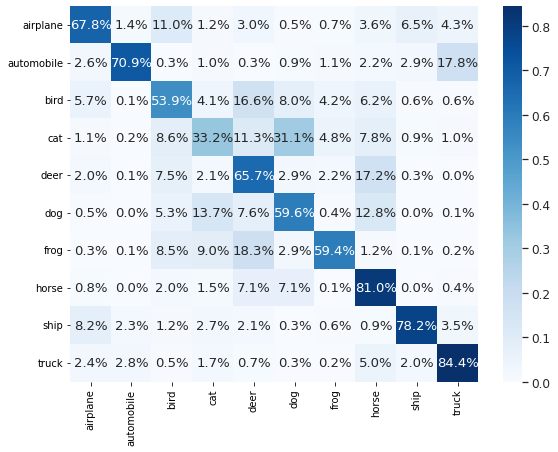

In [48]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#CF function

In [49]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

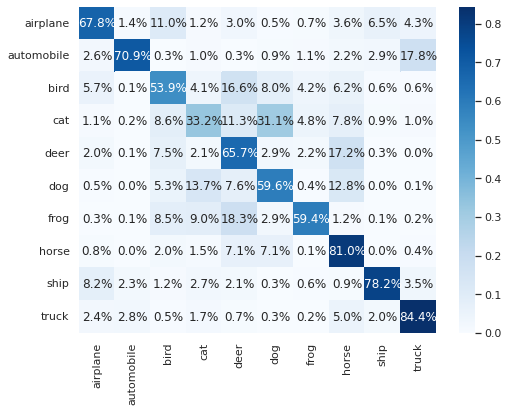

In [50]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [51]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [52]:
df[:5]

,label,predict
0,3,5
1,8,8
2,8,8
3,0,8
4,6,6


In [53]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
155,5,3
158,5,3
178,5,3
238,5,3
...,...,...
9657,5,3
9853,5,3
9918,5,3
9922,5,3


# 查看預測錯誤資料

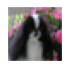

label: dog
predict: dog
airplane   Probability:0.004873472
automobile Probability:0.000016548
bird       Probability:0.103257157
cat        Probability:0.161362916
deer       Probability:0.024835050
dog        Probability:0.574726164
frog       Probability:0.001192298
horse      Probability:0.129435629
ship       Probability:0.000192688
truck      Probability:0.000108104


In [54]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,42)

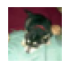

label: dog
predict: bird
airplane   Probability:0.069592796
automobile Probability:0.000975153
bird       Probability:0.262491256
cat        Probability:0.221203879
deer       Probability:0.166163594
dog        Probability:0.149678782
frog       Probability:0.034856528
horse      Probability:0.086407103
ship       Probability:0.002184871
truck      Probability:0.006446067


In [55]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,128)